<h1>Capstone 1</h1>
<h2>White Wine Quality, UC Irvine</h2> 
(Source: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009)
<h4>Audrey Rager</h4>
<h4>October 17, 2020</h4>
<h2>Import Python Packages</h2>

In [1]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import datetime as dt
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.stats.weightstats as smsw
import pylab

# Import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import svm
#from sklearn import cross_validation
from scipy import stats as st
import warnings 
warnings.filterwarnings('ignore')

# Import pyplot from matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')


<h2>Data Wrangling</h2>

In [2]:
#Import csv files into Pandas data frames
#reddf = pd.read_csv('winequality-red.csv',sep=";")
whitedf = pd.read_csv('winequality-white.csv',sep=";")
df = pd.read_csv('winequality-white.csv',sep=";")


In [3]:
#Look at the first few records of combined white wine dataframe with new column
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


Plot Histograms

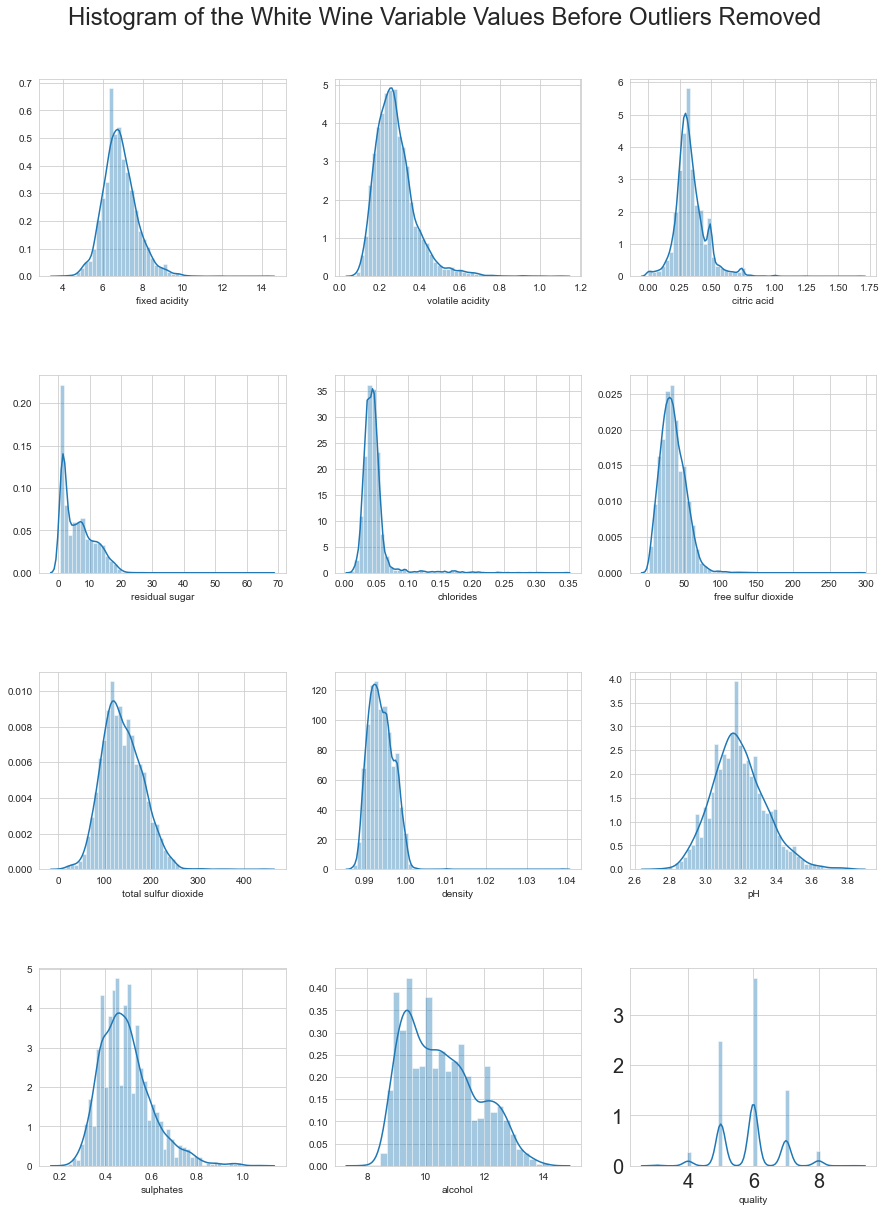

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/WhiteHistogramsBOD.png'

<Figure size 432x288 with 0 Axes>

In [7]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

#plot_columns = ['quality','fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol']
    


myhistplot = subplot_hist(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variable Values Before Outliers Removed")


plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/WhiteHistogramsBOD.png")



Boxplots

In [ ]:
#Boxplots
def subplot_boxPlot(data, row = 3, column = 4, title = "Subplots", height = 25, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.boxplot(df.iloc[:, i], ax=ax, orient='v')
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myBoxplot = subplot_boxPlot(df[plot_columns], row = 3, column = 4, title = "Boxplots of the White Wine Variable Values Before Outliers Removed")


plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/WhiteBoxPlotsBOD.png")



Computing Skewness

In [8]:
plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    

# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skew")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('White Wine Skewness')

skewness_check(df[plot_columns])

White Wine Skewness


,Column,Skewness,Skew Category
0,fixed acidity,0.647553,Heavily Skewed
1,volatile acidity,1.576497,Heavily Skewed
2,citric acid,1.281528,Heavily Skewed
3,residual sugar,1.076764,Heavily Skewed
4,chlorides,5.021792,Heavily Skewed
5,free sulfur dioxide,1.406314,Heavily Skewed
6,total sulfur dioxide,0.390590,Light Skew
7,density,0.977474,Heavily Skewed
8,pH,0.457642,Light Skew
9,sulphates,0.976894,Heavily Skewed


Print IQR

In [9]:
ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = df[myValue].max()
    myValueMin = df[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = df[myValue].quantile(0.25)
    Q3 = df[myValue].quantile(0.75)
    IQR = Q3 - Q1

    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    
   

fixed acidity maximum: 14.2
fixed acidity minimum: 3.8
fixed acidity Q1: 6.3
fixed acidity Q3: 7.3
fixed acidity range: 10.399999999999999
fixed acidity IQR: 1.0
ratio of Range fo IQR: 10.399999999999999

volatile acidity maximum: 1.1
volatile acidity minimum: 0.08
volatile acidity Q1: 0.21
volatile acidity Q3: 0.32
volatile acidity range: 1.02
volatile acidity IQR: 0.11000000000000001
ratio of Range fo IQR: 9.272727272727272

citric acid maximum: 1.66
citric acid minimum: 0.0
citric acid Q1: 0.27
citric acid Q3: 0.39
citric acid range: 1.66
citric acid IQR: 0.12
ratio of Range fo IQR: 13.833333333333334

residual sugar maximum: 65.8
residual sugar minimum: 0.6
residual sugar Q1: 1.7
residual sugar Q3: 9.9
residual sugar range: 65.2
residual sugar IQR: 8.200000000000001
ratio of Range fo IQR: 7.951219512195121

chlorides maximum: 0.34600000000000003
chlorides minimum: 0.009000000000000001
chlorides Q1: 0.036000000000000004
chlorides Q3: 0.05
chlorides range: 0.337
chlorides IQR: 0.0139

Observations regarding White Wine variables
<br><br>
<ul>
    <li>Most quality values are concentrated in the 5, 6 and 7 categories. A small proportion is in the categories 3, 4, 8, and 9.  No samples fall in the categories 1, 2 and 10.
    <li>Fixed acidity, volatile acidity and citric acid have outliers to the right (right skewed). Removing these outliers should make the distributions symmetrical.
    <li>Residual sugar has a positively skewed distribution; even after eliminating the outliers distribution will remain skewed.
    <li>Some of the variables, e.g . free sulphur dioxide, density, have a few outliers but these are very different from the rest.
    <li>Mostly outliers are on the larger (right) side.
    <li>Alcohol and density do not have a normal distriubition.  They both have irregular shaped distributions with one peak and two plateaus; Neither have pronounced outliers.


</ul>

 

Spearman

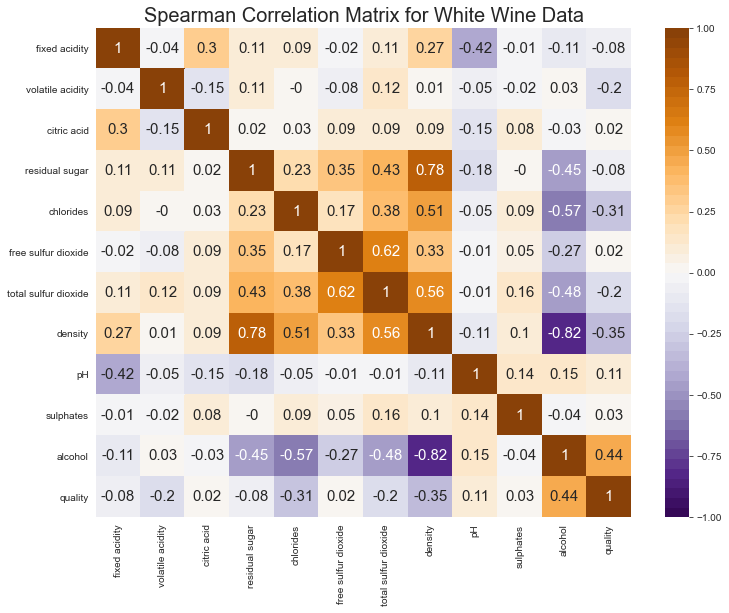

In [10]:
def confusion_matrix_plot(data, title = "Spearman Correlation Matrix for Wine Data Before Outliers Removed", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="spearman"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Spearman Correlation Matrix for White Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineSpearmanBOD.png")





In [11]:
print("Spearman")
df.corr(method ="spearman")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.440369
pH                      0.109362
sulphates               0.033319
free sulfur dioxide     0.023713
citric acid             0.018333
residual sugar         -0.082070
fixed acidity          -0.084485
volatile acidity       -0.196562
total sulfur dioxide   -0.196680
chlorides              -0.314488
density                -0.348351
Name: quality, dtype: float64

Pearson's

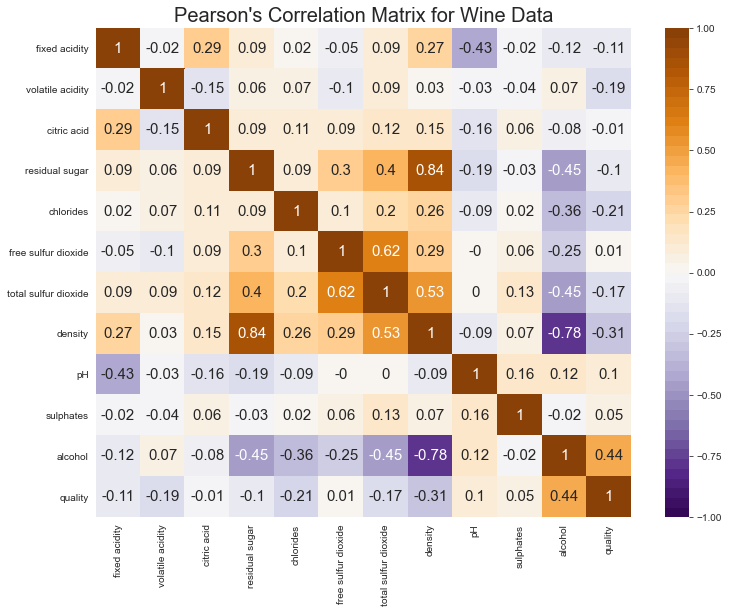

In [12]:
def confusion_matrix_plot(data, title = "Pearson's Correlation Matrix for White Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Pearson's Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWinePearsonsBOD.png")



In [13]:
print("Spearman")
df.corr(method ="pearson")['quality'].sort_values(ascending=False)


Spearman


quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

Kendall

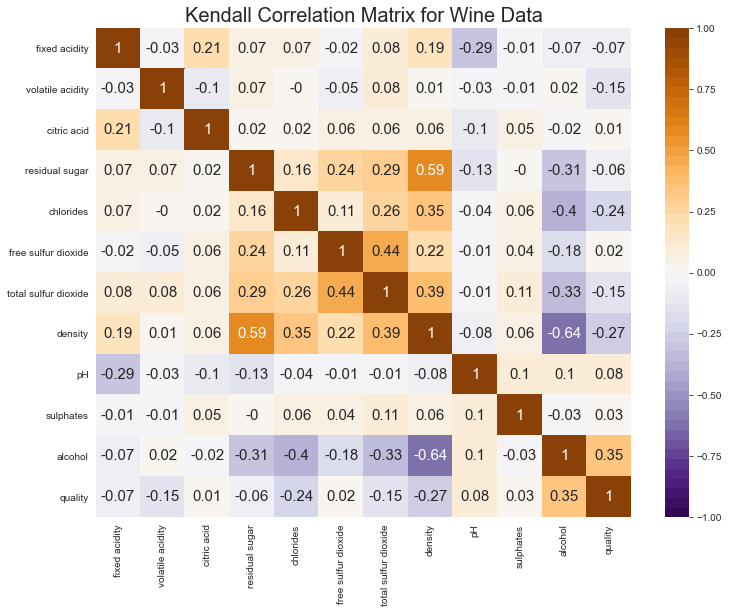

In [14]:
def confusion_matrix_plot(data, title = "Kendall Correlation Matrix for Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Kendall Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineKendallBOD.png")



In [15]:
print("Kendall")
df.corr(method ="kendall")['quality'].sort_values(ascending=False)

Kendall


quality                 1.000000
alcohol                 0.346672
pH                      0.084441
sulphates               0.026403
free sulfur dioxide     0.017164
citric acid             0.014557
residual sugar         -0.063087
fixed acidity          -0.065474
total sulfur dioxide   -0.151230
volatile acidity       -0.154787
chlorides              -0.244856
density                -0.266598
Name: quality, dtype: float64

Scatterplots of Predictors

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/winescattermatrix.png'

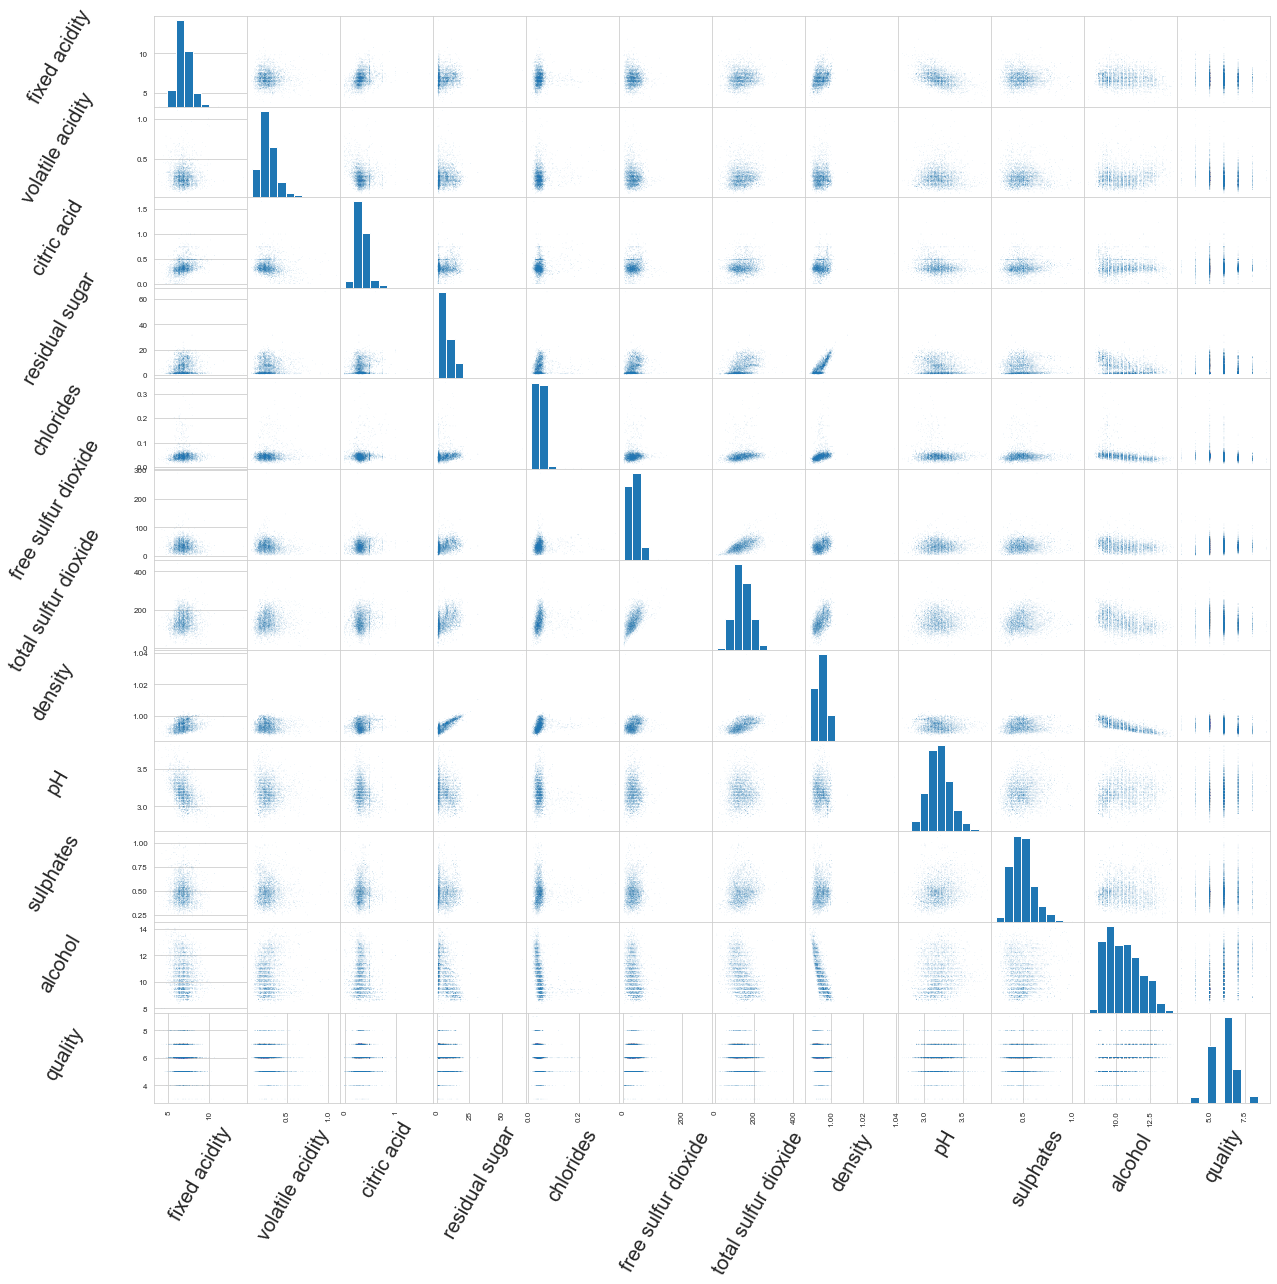

In [16]:
scatter_matrix = pd.plotting.scatter_matrix(
    df,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    
plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/winescattermatrix.png")

<h2>Identifying and Removing Outliers</h2>
<p>A predictor variable is considered to be an outlier only if it is > Q<sub>3</sub> + 1.5 IQR. Because all skewed data are positively skewed, we only need to eliminate those values.</p>

In [ ]:
winedf = df

In [ ]:
# Filtering Values between Q1-1.5IQR and Q3+1.5IQR
ValueList = ('fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol')

for myValue in ValueList:
    #compute range of data
    myValueMax = winedf[myValue].max()
    myValueMin = winedf[myValue].min()
    myValueRange = myValueMax - myValueMin
    
    # Computing IQR
    Q1 = winedf[myValue].quantile(0.25)
    Q3 = winedf[myValue].quantile(0.75)
    IQR = Q3 - Q1
    gtdropvalue = (Q3 + (1.5 * IQR))
    ltdropvalue = (Q1 - (1.5 * IQR))
    
    index_names_right = winedf[winedf[myValue] >= gtdropvalue].index
    index_names_left = winedf[winedf[myValue] <= ltdropvalue].index
    winedf.drop(index_names_right, inplace = True)
    winedf.drop(index_names_left, inplace = True)
    print(myValue + ' maximum: ' + str(myValueMax))
    print(myValue + ' minimum: ' + str(myValueMin))
    print(myValue + ' Q1: ' + str(Q1))
    print(myValue + ' Q3: ' + str(Q3))
    print(myValue + ' range: ' + str(myValueRange))
    print(myValue + ' IQR: ' + str(IQR))
    print('ratio of Range fo IQR: ' + str(myValueRange/IQR))
    print()
    
   

In [ ]:
winedf.describe()

Histograms

In [ ]:
#Historgrams  - outliers removed (winedf)
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(winedf.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

#plot_columns = ['quality','fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol']
    


myhistplot = subplot_hist(winedf[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variables Outliers Removed")


plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/WhiteHistogramsBOD.png")



Box Plots

In [ ]:
#Boxplots - outliers removed (winedf)
def subplot_boxPlot(data, row = 3, column = 4, title = "Subplots", height = 25, width = 15):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.boxplot(winedf.iloc[:, i], ax=ax, orient='v')
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myBoxplot = subplot_boxPlot(winedf[plot_columns], row = 3, column = 4, title = "Boxplots of the White Wine Variable Values Before Outliers Removed")


plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/WhiteBoxPlotsBOD.png")



Computing Skewness

In [ ]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('Wine Skewness')

skewness_check(winedf[plot_columns])

<h2>Correlation Between Target Variable and Predictor Attributes</h2>

In [ ]:
winedf.corr(method ="spearman")['quality'].sort_values(ascending=False)

In [ ]:
def confusion_matrix_plot(data, title = "Pearson's Correlation Matrix for White Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="pearson"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(winedf, title = "Pearson's Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWinePearsonsBOD.png")



In [ ]:
winedf.corr(method ="pearson")['quality'].sort_values(ascending=False)

In [ ]:
def confusion_matrix_plot(data, title = "Kendall Correlation Matrix for Wine Data", height = 9, width = 12):
    # Get the confusion matrix
    conf_mat = round(data.corr(method ="kendall"), 2)
    # Create the heatmap
    plt.figure(figsize = (width, height))
    ax = sns.heatmap(conf_mat, annot=True, annot_kws={"size": 15}, cmap = sns.color_palette("PuOr_r", 50), 
                     vmin = -1, vmax = 1)
    # Customize the style of the heatmap
    # Set the title, it's font size and position
    ax.axes.set_title(title, fontsize = 20)
    ax.title.set_position([.5, 1.03])
    # Show the plot
    plt.show()
    
# Call the confusion matrix function
confusion_matrix_plot(df, title = "Kendall Correlation Matrix for Wine Data")
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/CorrelationMatricesBOD/WhiteWineKendallBOD.png")



In [ ]:
winedf.corr(method ="kendall")['quality'].sort_values(ascending=False)

We want to find values that are either highly positively correlated (close to 1) or highly negatively correlated (close to negative 1). Looking at the bottom row (or rightmost column), we can see the correlation coefficients between the target variable, quality, and the indicator variables.  Of course, quality is perfectly correlated with itself, so we will ignore that. 

The most significant correlation coeffients for red wine quality in descending order are (1) alcohol (0.45), (2) density (-0.32), (3) chlorides (-0.30), (4) volatile acidity (-0.26), (5) citric acid (.11), (6) fixed acidity (-0.098), (7) free sulfur dioxide (0.087), (8) total sulfur dioxide (-0.055),(9) pH (-0.033), (10) sulphates (-0.030), and (11) residual sugar (-0.017).

In [ ]:
scatter_matrix = pd.plotting.scatter_matrix(
    winedf,
    figsize  = [20, 20],
    marker   = ".",
    s        = 0.5,
    diagonal = "hist",
    range_padding = 0.1
)

for ax in scatter_matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 60)
    ax.set_ylabel(ax.get_ylabel(), labelpad = 70, fontsize = 20, rotation = 60)
    
#plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/winescattermatrix.png")

<h2>Wine Quality Indicators</h2>

<h3>1. Alcohol</h3>

In [17]:
myPath = "/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/"

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/01alcoholByQualityOD.png'

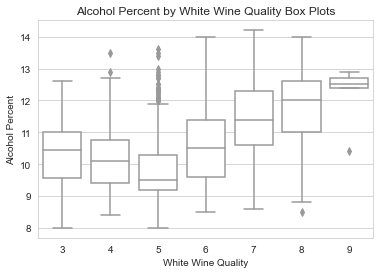

In [18]:
#Quality by Alcohol

myAttribute = 'alcohol'
myYLabel = 'Alcohol Percent'
myNum = '01'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName)

<h3>2. Density</h3>  

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/02densityByQualityOD.png'

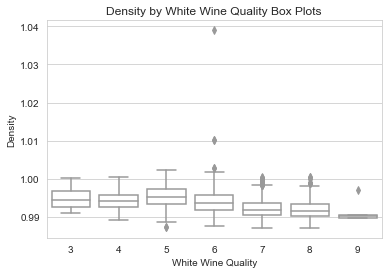

In [19]:
#Quality by Density

myAttribute = 'density'
myYLabel = 'Density'
myNum = '02'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>3. Chlorides</h3>    

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/03chloridesByQualityOD.png'

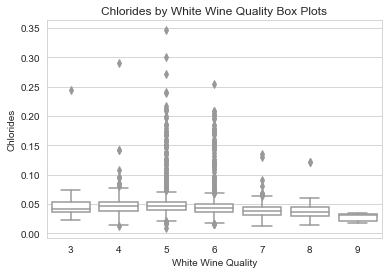

In [20]:
#Quality by Chlorides

myAttribute = 'chlorides'
myYLabel = 'Chlorides'
myNum = '03'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>4. Volatile Acidity</h3>      

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/04volatile acidityByQualityOD.png'

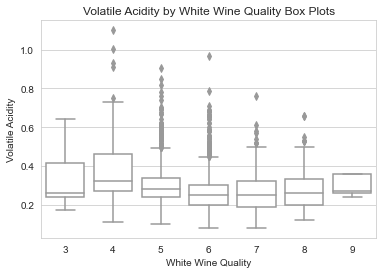

In [21]:
#Quality by Volatile Acidity


myAttribute = 'volatile acidity'
myYLabel = 'Volatile Acidity'
myNum = '04'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>5. Citric Acid</h3>

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/05citric acidByQualityOD.png'

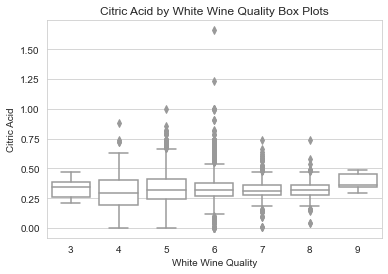

In [22]:
#Quality by Citric Acid

myAttribute = 'citric acid'
myYLabel = 'Citric Acid'
myNum = '05'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>6. Fixed Acidity</h3>  

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/06fixed acidityByQualityOD.png'

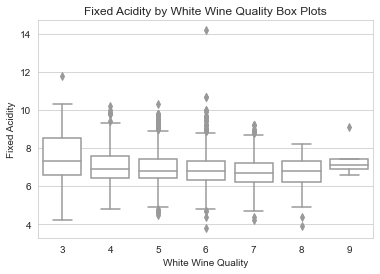

In [23]:
#Quality by Fixed Acidity

myAttribute = 'fixed acidity'
myYLabel = 'Fixed Acidity'
myNum = '06'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>7. Free Sulfur Dioxide</h3>  

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/07free sulfur dioxideByQualityOD.png'

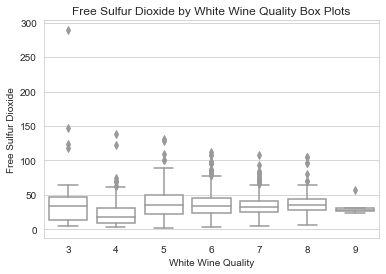

In [24]:
#Quality by Free Sulfur Dioxide

myAttribute = 'free sulfur dioxide'
myYLabel = 'Free Sulfur Dioxide'
myNum = '07'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>8. Total Sulfur Dioxide</h3> 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/08total sulfur dioxideByQualityOD.png'

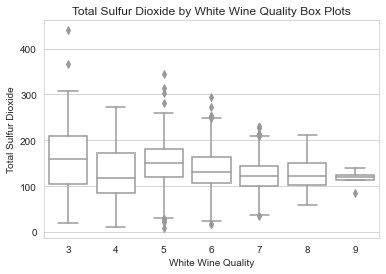

In [25]:
#Quality by Total Sulfur Dioxide

myAttribute = 'total sulfur dioxide'
myYLabel = 'Total Sulfur Dioxide'
myNum = '08'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>9. pH</h3> 

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/09pHByQualityOD.png'

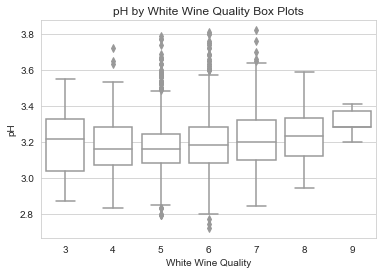

In [26]:
#Quality by pH

myAttribute = 'pH'
myYLabel = 'pH'
myNum = '09'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>10. Sulphates</h3>

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/10sulphatesByQualityOD.png'

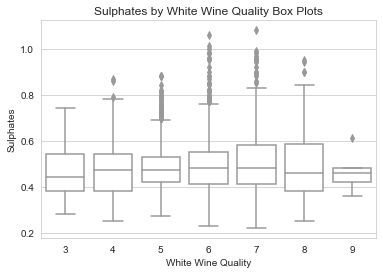

In [27]:
#Quality by Sulphates

myAttribute = 'sulphates'
myYLabel = 'Sulphates'
myNum = '10'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>11. Residual Sugar</h3>

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/OutliersDroppedFigures/BoxPlotsOD/11residual sugarByQualityOD.png'

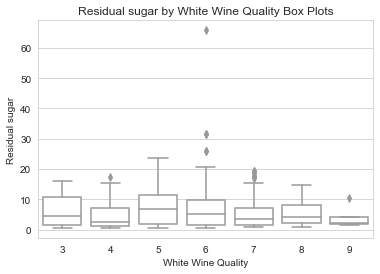

In [28]:
#Quality by Residual Sugar

myAttribute = 'residual sugar'
myYLabel = 'Residual sugar'
myNum = '11'

mySuffix = 'ByQualityOD'
myFileExtension = '.png'
myFileName = myPath+myNum+myAttribute+mySuffix+myFileExtension

bx = sns.boxplot(x='quality', y=myAttribute, data = df, color = 'w')
bx.set(xlabel='White Wine Quality', ylabel=myYLabel, title=myYLabel+' by White Wine Quality Box Plots')
plt.savefig(myFileName)

print(myFileName) 

<h3>Computing Skewness</h3>

In [29]:
# Computing the skewness into dataFrame
def skewness_check(data):
    # Find the skewness in the dataset
    skew_value = list(st.skew(data))
    skew_string = []
    # Looping through the skew value to find the Skew category
    for skew in skew_value:
        if skew >= -.5 and skew <= .5:
            skew_string.append("Light Skewed")
        elif skew <= -.5 and skew >= -1 and skew <= .5 and skew >= 1:
            skew_string.append("Moderately Skewed")
        else:
            skew_string.append("Heavily Skewed")
    # Ctreating data frame
    skew_df = pd.DataFrame({'Column': data.columns, 'Skewness': skew_value, 'Skew Category': skew_string})
    return skew_df

# Skewness for Wine
print('White Wine Skewness (outliers removed)')

skewness_check(df[plot_columns])

White Wine Skewness (outliers removed)


,Column,Skewness,Skew Category
0,fixed acidity,0.647553,Heavily Skewed
1,volatile acidity,1.576497,Heavily Skewed
2,citric acid,1.281528,Heavily Skewed
3,residual sugar,1.076764,Heavily Skewed
4,chlorides,5.021792,Heavily Skewed
5,free sulfur dioxide,1.406314,Heavily Skewed
6,total sulfur dioxide,0.390590,Light Skewed
7,density,0.977474,Heavily Skewed
8,pH,0.457642,Light Skewed
9,sulphates,0.976894,Heavily Skewed


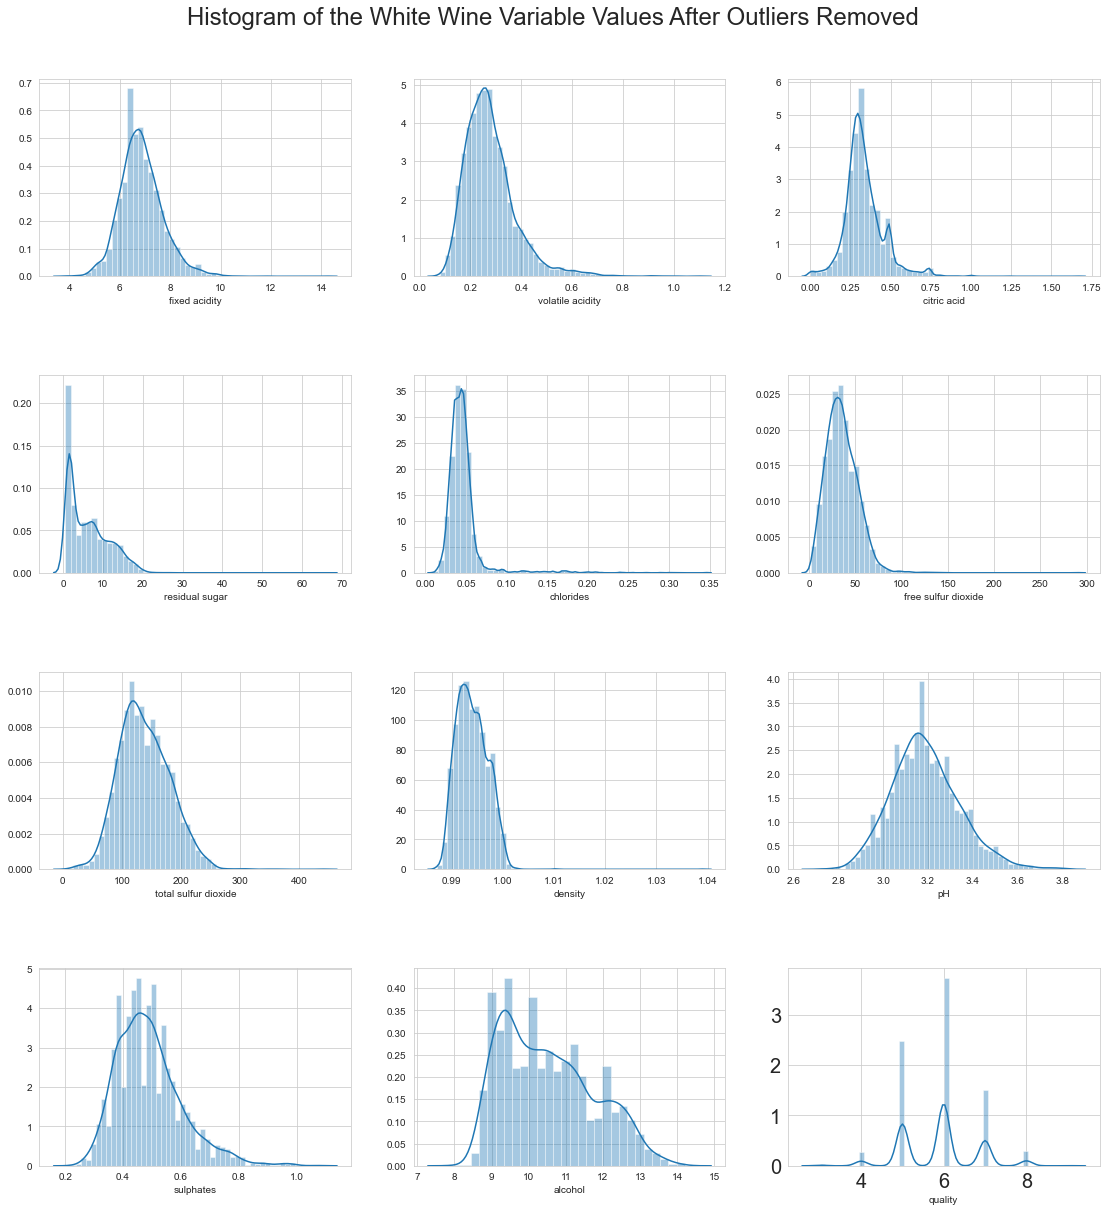

FileNotFoundError: [Errno 2] No such file or directory: '/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/WhiteHistogramsOD.png'

<Figure size 432x288 with 0 Axes>

In [30]:
def subplot_hist(data, row = 4, column = 3, title = "Subplots", height = 20, width = 19):
    # Create a figure instance, and the subplots
    fig = plt.figure(figsize = (width, height))
    fig.suptitle(title, fontsize=24, y = 0.93)
    # Run loop over the all the variables
    for i in range(data.shape[1]):
        # Create the axis line
        ax = fig.add_subplot(row, column, i + 1)
        fig.subplots_adjust(hspace = .5)
        # Create histogram for each variable
        plot = sns.distplot(df.iloc[:, i], ax=ax)
    # Show the plot
    plot.tick_params(labelsize = 20)
    plt.show()

plot_columns = ['fixed acidity','volatile acidity', 'citric acid', 'residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density', 'pH', 'sulphates','alcohol','quality']
    


myhistplot = subplot_hist(df[plot_columns], row = 4, column = 3, title = "Histogram of the White Wine Variable Values After Outliers Removed")


plt.savefig("/Users/audreyrager/Documents/Springboard/Capstone1Presentation/Figures/BeforeODFigures/WhiteHistogramsOD.png")



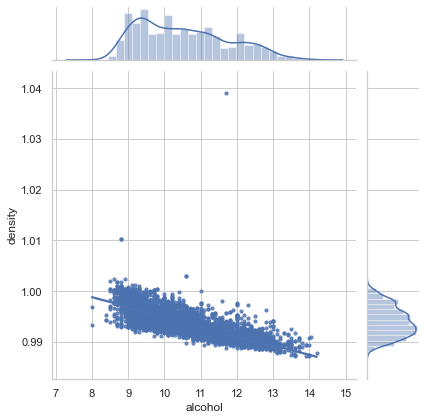

In [48]:
#Plot variables against eaach other
#Plot the histogram for alchol and density against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot(data=df,x='alcohol', y='density',  kind='reg',scatter_kws={'s':10})
plt.show()


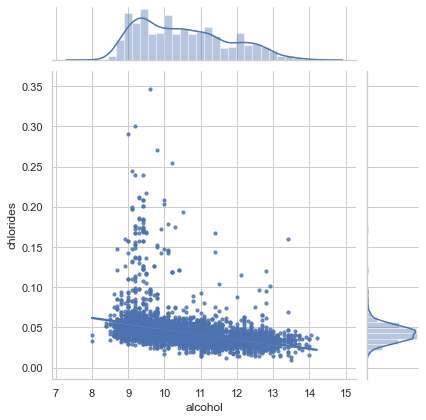

In [49]:
#Plot variables against eaach other
#Plot the histogram for alchol and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

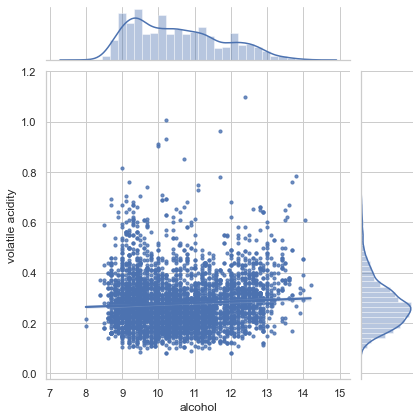

In [50]:
#Plot variables against eaach other
#Plot the histogram for alchol and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('alcohol', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

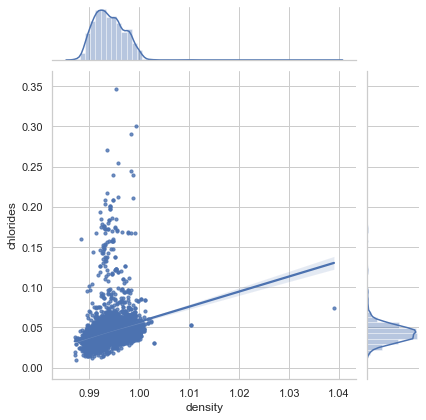

In [51]:
#Plot variables against eaach other
#Plot the histogram for density and chlorides against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'chlorides', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

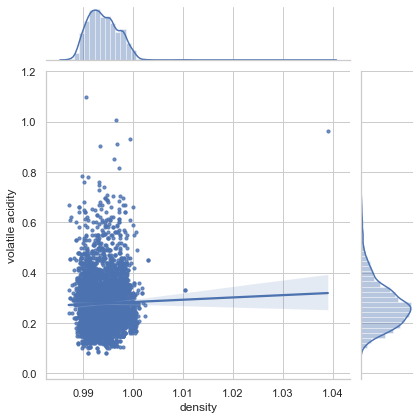

In [52]:
#Plot variables against eaach other
#Plot the histogram for density and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('density', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

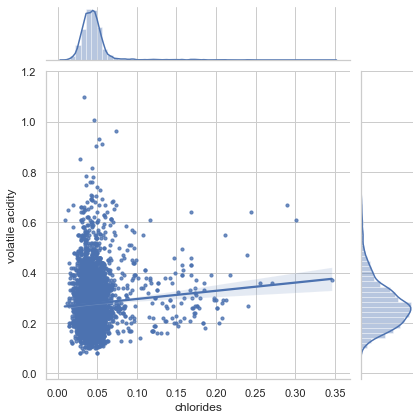

In [53]:
#Plot variables against eaach other
#Plot the histogram for chlorides and volatile acidity against eachother

sns.set(style="whitegrid", color_codes=True)
sns.jointplot('chlorides', 'volatile acidity', data=df, kind='reg',scatter_kws={'s':10})
plt.show()

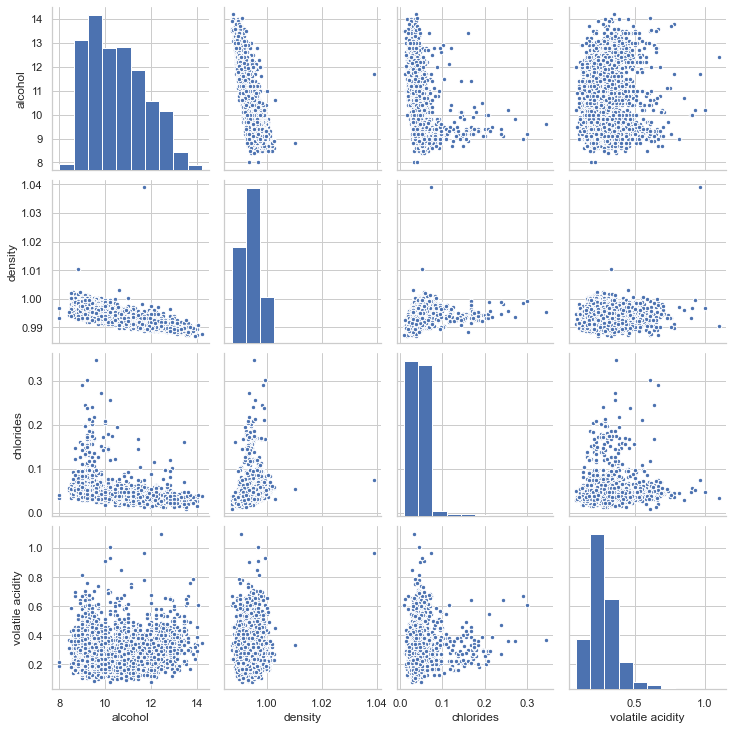

In [54]:

data = df[['alcohol', 'density', 'chlorides', 'volatile acidity']]

sns.pairplot(data, plot_kws=dict(s=20, linewidth=1))